<a href="https://colab.research.google.com/github/DhawalV1/Computational_Neuroscience/blob/main/Convolving_with_HRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Convolving with the hemodyamic response function

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import gamma

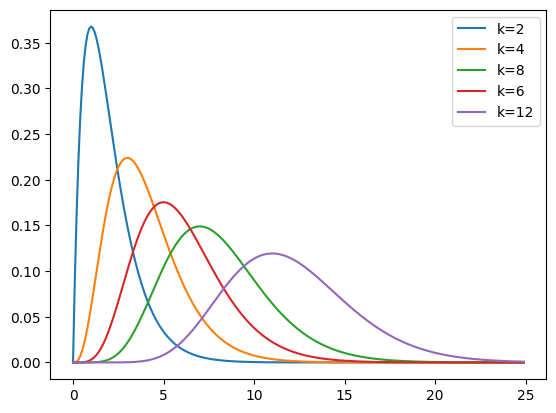

In [26]:
x = np.arange(0, 25, 0.1)
plt.plot(x, gamma.pdf(x, 2), label='k=2')

plt.plot(x, gamma.pdf(x, 4), label='k=4')

plt.plot(x, gamma.pdf(x, 8), label='k=8')
plt.plot(x, gamma.pdf(x, 6), label='k=6')
plt.plot(x, gamma.pdf(x, 12), label='k=12')

plt.legend()


##Constructing a hemodynamic response function


We can use these gamma functions to construct a continuous function that is close to the hemodynamic response we observe for a single brief event in the brain.

In [29]:
def hrf(times):
    """ Return values for HRF at given times """
    # Gamma pdf for the peak
    peak_values = gamma.pdf(times, 6)
    # Gamma pdf for the undershoot
    undershoot_values = gamma.pdf(times, 12)
    # Combine them
    values = peak_values - 0.35 * undershoot_values
    # Scale max to 0.6
    return values / np.max(values)*0.6


Text(0, 0.5, 'HRF model of signal')

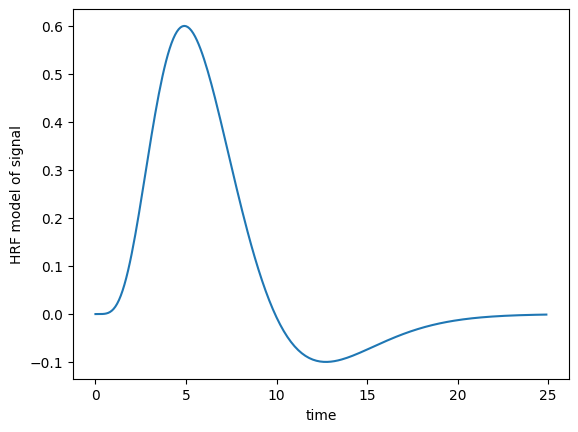

In [30]:
plt.plot(x, hrf(x))
plt.xlabel('time')
plt.ylabel('HRF model of signal')


12


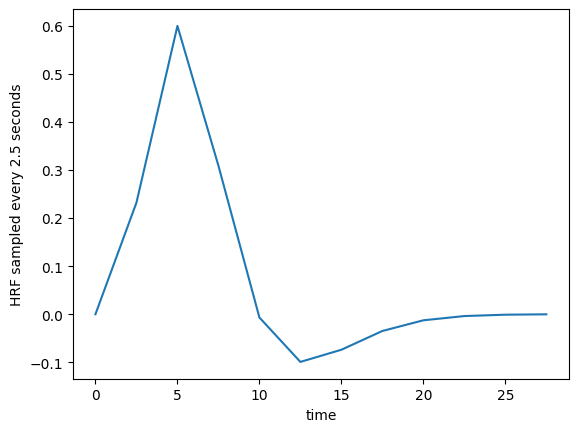

In [31]:
TR = 2.5
tr_times = np.arange(0, 30, TR)
hrf_at_trs = hrf(tr_times)

# Print the length of hrf_at_trs
print(len(hrf_at_trs))  # Output: 12

# Plot the HRF sampled every 2.5 seconds
plt.plot(tr_times, hrf_at_trs)
plt.xlabel('time')
plt.ylabel('HRF sampled every 2.5 seconds')
plt.show()


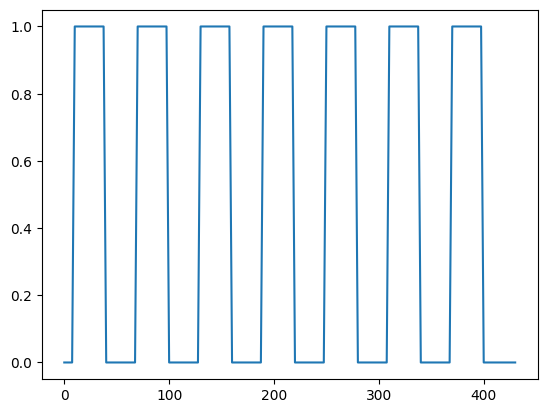

In [34]:
from stimuli import events2neural
n_vols = 173
neural_prediction = events2neural('ds114_sub009_t2r1_cond.txt',
                                  TR, n_vols)
all_tr_times = np.arange(173) * TR
plt.plot(all_tr_times, neural_prediction)


In [35]:
convolved = np.convolve(neural_prediction, hrf_at_trs)
N = len(neural_prediction)  # M == n_vols == 173
M = len(hrf_at_trs)  # M == 12
len(convolved) == N + M - 1

True

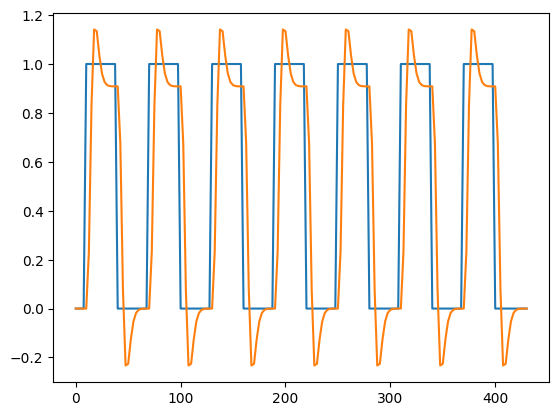

In [36]:
convolved = convolved[:- len(hrf_at_trs) + 1]
plt.plot(all_tr_times, neural_prediction)
plt.plot(all_tr_times, convolved)

In [38]:
np.savetxt('ds114_sub009_t2r1_conv.txt', convolved, fmt='%2.6f')
back = np.loadtxt('ds114_sub009_t2r1_conv.txt')
np.allclose(convolved, back, atol=1e-6)

True